# Computer Vision (Winter 2021/22)

#### Practice Session 5: Morphology

November 16th, 2021

Axel Schaffland, Ulf Krumnack

Institute of Cognitive Science
University of Osnabrück

## Today's Session

* Seperable Kernels
* Information content and entropy
* Binary Operators and Structuring Elements
* Skeletonization with Hit or Miss (Handwritten Example)
* Sheet 03
* Interactive plots
* Matplotlib animations


### Seperable Kernels

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.ndimage.filters import convolve


img = imageio.imread('imageio:camera.png')[100:200,200:300].astype(np.float32)/255

# Gauss
#horizontal_kernel = 1/64 *np.array([[1,6,15,20,15,6,1]],dtype=np.float32)
#vertical_kernel = 1/64 * np.array([[1,6,15,20,15,6,1]],dtype=np.float32).T

# Sobel
horizontal_kernel = 1/4 * np.array([[1,2,1]],dtype=np.float32)
vertical_kernel = np.array([[1, 0, -1]],dtype=np.float32).T


combined_kernel = vertical_kernel * horizontal_kernel


img_hor = convolve(img, horizontal_kernel)
img_ver = convolve(img, vertical_kernel)
img_sep = convolve(convolve(img, vertical_kernel), horizontal_kernel)
img_comb = convolve(img, combined_kernel)

plt.figure(figsize=(12,12)); plt.gray()
plt.subplot(3,3,1); plt.imshow(vertical_kernel, vmin=-1, vmax=1); plt.title("Vertical Kernel")
plt.subplot(3,3,2); plt.imshow(horizontal_kernel, vmin=-1, vmax=1); plt.title("Horizontal Kernel")
plt.subplot(3,3,3); plt.imshow(combined_kernel, vmin=-1, vmax=1); plt.title("Combined Kernel")
plt.subplot(3,3,4); plt.imshow(img); plt.title("Original")
plt.subplot(3,3,5); plt.imshow(img_hor); plt.title("Horizontal")
plt.subplot(3,3,6); plt.imshow(img_ver); plt.title("Vertical")
plt.subplot(3,3,7); plt.imshow(img_sep); plt.title("Seperate")
plt.subplot(3,3,8); plt.imshow(img_comb); plt.title("2D Kernel")
plt.subplot(3,3,9); plt.imshow(img_sep - img_comb, vmin=0, vmax= 1); plt.title("Difference")

plt.show()

## Python background

In [ ]:
# Preparation
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.ndimage.filters import laplace, sobel, correlate
from skimage import draw

plt.rcParams['image.cmap'] = 'gray'

### Binarization

In [ ]:
%matplotlib inline

img = imageio.imread('imageio:camera.png').astype(float)/255

lp = laplace(img)
lp_b = lp > 0

img_b = img > .5

print("Laplace image minium is {}, maximum is {}".format(lp.min(), lp.max()))
print("Binary laplace image minium is {}, maximum is {}".format(lp_b.min(), lp_b.max()))
print("Datatype of binary image is {}.".format(lp_b.dtype))
print(lp_b[100:110,100:110])
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(img)
plt.subplot(2,2,2)
plt.imshow(img_b)
plt.subplot(2,2,3)
plt.imshow(lp)
plt.subplot(2,2,4)
plt.imshow(lp_b)
plt.show()

### Binary Operators

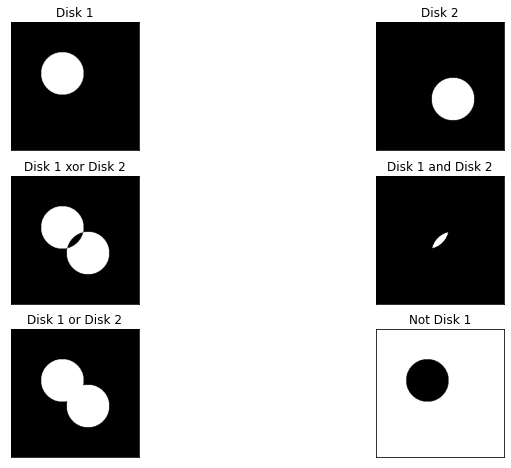

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import draw

circle_left_img = np.zeros(shape=(300, 300), dtype=np.uint8)
circle_left_img[draw.disk((120, 120), 50)] = 1

circle_right_img = np.zeros_like(circle_left_img)
circle_right_img[draw.disk((180, 180), 50)] = 1

plt.figure(figsize=(12, 8)); plt.gray()
plt.subplot(3, 2, 1); plt.title("Disk 1"); plt.xticks([]); plt.yticks([])
plt.imshow(circle_left_img)

plt.subplot(3, 2, 2); plt.title("Disk 2"); plt.xticks([]); plt.yticks([])
plt.imshow(circle_right_img)

plt.subplot(3, 2, 3); plt.title("Disk 1 xor Disk 2"); plt.xticks([]); plt.yticks([])
plt.imshow(circle_left_img ^ circle_right_img)

plt.subplot(3, 2, 4); plt.title("Disk 1 and Disk 2"); plt.xticks([]); plt.yticks([])
plt.imshow(circle_left_img & circle_right_img)

plt.subplot(3, 2, 5); plt.title("Disk 1 or Disk 2"); plt.xticks([]); plt.yticks([])
plt.imshow(circle_left_img | circle_right_img)

plt.subplot(3, 2, 6); plt.title("Not Disk 1"); plt.xticks([]); plt.yticks([])
plt.imshow(~circle_left_img)

plt.show()

### Morphology 
https://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology

In [ ]:
# Dilation enlarges bright regions
from skimage.morphology import square, dilation

img = np.zeros((11,11), dtype=np.uint8)
img[(2,8),2:9] = 255

img_dil = dilation(img, square(3))

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img_dil)
plt.show()

### Or
https://docs.scipy.org/doc/scipy-0.14.0/reference/ndimage.html#module-scipy.ndimage.morphology

`scipy.ndimage` more basic compared to `skimage`

### Or
https://docs.opencv.org/trunk/d9/d61/tutorial_py_morphological_ops.html

### Structuring Elements

[https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generate_binary_structure.html](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.generate_binary_structure.html)

In [ ]:
from skimage.morphology import disk
from scipy.ndimage import morphology as morph, generate_binary_structure

struct_elem1 = generate_binary_structure(2, 1)
struct_elem2 = generate_binary_structure(2, 2)
struct_elem3 = disk(13)

plt.figure(figsize=(12,12))
plt.subplot(1, 3,1); plt.imshow(struct_elem1, vmin=0, vmax=1); plt.title("Cross")
plt.xticks([]); plt.yticks([])
plt.subplot(1, 3,2); plt.imshow(struct_elem2, vmin=0, vmax=1); plt.title("Square")
plt.xticks([]); plt.yticks([])
plt.subplot(1, 3,3); plt.imshow(struct_elem3, vmin=0, vmax=1); plt.title("Disk")
plt.xticks([]); plt.yticks([])
plt.show()

# Matplotlib interaction

Matplotlib supports different backends. For notebooks
* `inline`: creates (immutable) images
* `notebook`: interactive interface
    
To use the `notebook` backend, start your cell with
```python
%matplotlib notebook
```

In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt
import imageio

img = imageio.imread('imageio:camera.png')

fig = plt.figure()
mpl_image = plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
img2 = imageio.imread('imageio:moon.png')
mpl_image.set_data(img2)

In [ ]:
mpl_image.set_data(img)

In [ ]:
plt.close(fig)

## Reacting to mouse events

Matplotlib allows for interaction using an [event interface](https://matplotlib.org/stable/users/event_handling.html). Events include:
* Mouse button press and release
* Mouse move events
* Keyboard press and release (requires focus!)
* Figure events (resize, draw, close)

In [ ]:
%matplotlib notebook
import imageio
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.gca()
mpl_text = ax.text(0.,0.97, "", va="bottom", ha="left")

def onclick(event):
    text = f"button={event.button}, x={event.x}, y={event.y}, xdata={event.xdata:.2f}, ydata={event.ydata:.2f}"
    mpl_text.set_text(text)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
plt.disconnect(cid)
plt.close(fig)

This allows for interactive figures:

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import imageio

img = imageio.imread('imageio:camera.png').astype(np.float32) / 255
columns, rows = img.shape[:2]
row = 100

# plot the image
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); 
plt.imshow(img, cmap='gray')
mpl_line, = plt.plot([0, columns-1], [row, row])

# plot the row
ax2 = plt.subplot(1,2,2)
ax2.set_ylim([0,1])
c = np.arange(columns)
r = img[row,:].copy()
mpl_plot, = plt.plot([0, columns-1], [0, 0], 'b', label='image row')
plt.legend()

def onclick(event):
    row = int(event.ydata)
    mpl_line.set_data([0, columns-1], [row, row])
    mpl_plot.set_data(np.arange(columns), img[row, :])

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

## Matplotlib Widgets

Matplotlib also offers a set of [widgets](https://matplotlib.org/stable/api/widgets_api.html), including:
* buttons
* radio and checkboxes
* slider

In [ ]:
%matplotlib notebook
import imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
from skimage.filters import sobel

img = imageio.imread('imageio:camera.png').astype(np.float32) / 255

fig = plt.figure('Sobel filtering + Radio demo', figsize=(10, 5))

# show the image
ax1 = plt.subplot(1,2,1)
mpl_image = plt.imshow(img, cmap='gray')

# show the radio buttons
ax2 = plt.subplot(1,2,2)
butRadio = RadioButtons(ax2, ('None', 'Horizontal', 'Vertical', 'Magnitude'))

def onclick(filter):
    ax1.set_title(filter)
    if filter == 'None':
        mpl_image.set_data(img)
        mpl_image.set_clim(0,1)
    elif filter == 'Horizontal':
        mpl_image.set_data(sobel(img, axis=0))
        mpl_image.set_clim(-1,1)
    elif filter == 'Vertical':
        mpl_image.set_data(sobel(img, axis=1))
        mpl_image.set_clim(-1,1)
    elif filter == 'Magnitude':
        mpl_image.set_data(sobel(img))
        mpl_image.set_clim(0,1)

butRadio.on_clicked(onclick)
plt.show()

In [ ]:
%matplotlib notebook
import imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from skimage.filters import sobel

img1 = imageio.imread('imageio:camera.png').astype(np.float32) / 255
img2 = imageio.imread('imageio:moon.png').astype(np.float32) / 255

fig = plt.figure('Slider demo', figsize=(10, 5))

# show the image
ax1 = plt.subplot(1,2,1)
mpl_image = plt.imshow(img, cmap='gray')

# show the radio buttons
ax2 = plt.subplot(1,2,2)
plt.axis('off')
axSlider = plt.axes([0.55, 0.5, 0.3, 0.05])
slider = Slider(axSlider,'Mix', 0,1, valinit=0)

def on_slider_changed(value):
    ax1.set_title(f"{value:.2f}")
    mpl_image.set_data((1-value) * img1 + value * img2)

slider.on_changed(on_slider_changed)
plt.show()

# Matplotlib Animations

Animations may help to visualize and understand the effects of parameters.

## "Poor man's animation"

Idea: regularly update the figure:
1. setup the figure
2. provide a function to update the figure
3. create a loop to run the animation

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import imageio

img = imageio.imread('imageio:camera.png').astype(np.float32) / 255
columns, rows = img.shape[:2]

# plot the image
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); 
plt.imshow(img, cmap='gray')
mpl_line, = plt.plot([], [])

# plot the row
ax2 = plt.subplot(1,2,2)
ax2.set_ylim([0,1])
ax2.set_xlim([0, columns])
mpl_plot, = plt.plot([], [], 'b', label='image row')
plt.legend(loc='upper right')

plt.show()

In [ ]:
def show_row(row):
    mpl_line.set_data([0, columns-1], [row, row])
    mpl_plot.set_data(np.arange(columns), img[row, :])
    fig.canvas.draw()  # has to be called explicitly!

for row in range(len(img)):
    show_row(row)

## The `matplotlib.anmation` module

Matplotlib provides the [`animation` module](https://matplotlib.org/stable/api/animation_api.html) to create and work with animations.

To create an animation, different `Animation` classes can be used.
* `TimedAninmation`: The `matplotlib.animation.TimedAnimation` creates an animation by displaying new frames at regular time intervals.
* `FuncAninmation`: The `matplotlib.animation.FuncAnimation` is a subclass of the `TimedAnimation`. It creates an animation by calling a function in regular intervals to update a figure.
* `ArtistAnimation`: The `matplotlib.animation.FuncAnimation` is a subclass of the `TimedAnimation`. It creates an animation from a sequence of MatPlotLib artists.

### The `FuncAnimation` class

The `FuncAnimation` takes the following arguments:
* `func`: the function to be called to create the next frame.
* `frames`: can be a number or an iterator. Will be passed as first argument to the update function
* `interval`: delay between frames in milliseconds (default: 200 = 5 frames per second). A value of 40 will yield 25 frames per second.

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import imageio

img = imageio.imread('imageio:camera.png').astype(np.float32) / 255
columns, rows = img.shape[:2]

# show the image
fig = plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); 
plt.imshow(img, cmap='gray')
mpl_line, = plt.plot([], [])

# plot the row
ax2 = plt.subplot(1,2,2)
ax2.set_ylim([0,1])
ax2.set_xlim([0,columns])
mpl_plot, = plt.plot([], [], 'b', label='image row')
plt.legend(loc='upper right')

# animation function. This is called sequentially
def animate(i):
    mpl_line.set_data([0, columns-1], [i, i])
    mpl_plot.set_data(np.arange(columns), img[i, :])
    return [mpl_line, mpl_plot]

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, frames=len(img), interval=20, repeat=False, blit=True)

fig.show()

### Alternative: `ArtistAnimation`

* create animation using a fixed set of Artist objects
* for each frame a collection of Artist objects is given
* only those artists are made visible on the corresponding frame, other artists are made invisible

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import imageio

img = imageio.imread('imageio:camera.png').astype(np.float32) / 255
columns, rows = img.shape[:2]

fig = plt.figure(figsize=(10, 5))
# show the image
ax1 = plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')

# plot the row
ax2 = plt.subplot(1,2,2)
ax2.set_ylim([0,1])

# create a list of artists collections
frames = []
for row in range(rows):
    plt.subplot(1,2,1)
    mpl_line, = ax1.plot([0, columns-1], [row, row], 'b')
    plt.subplot(1,2,2)
    mpl_plot, = ax2.plot(np.arange(columns), img[row, :], 'b', label='image row')
    frames.append([mpl_line, mpl_plot])

anim = animation.ArtistAnimation(fig, frames, interval=20, repeat=False, blit=True)

fig.show()

### Showing animations in the notebook: `to_html5_video()`

In [ ]:
from IPython.display import HTML
HTML(anim.to_html5_video())  # this may need some time!

### Storing animations: `anim.save`

* animation can be stored in different formats
* various parameters can be passed to adapt the output (see [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.Animation.html#matplotlib.animation.Animation.save))
* different backends can be used (may have to be installed separately)

In [ ]:
anim.save('anim.mp4', fps=20)  # this may need some time!

In [ ]:
!ls

In [ ]:
from IPython.display import Video
Video("anim.mp4")

### Assignment Sheet 03

* Result images folder
    * Example images generated by our sample solution
* Assignment 04
    * Erosion and Dilation on grayscale images
        * Erosion = Minimum
        * Dilation = Maximum
    * Erosion and Dilation on color images
        * Repeat procedure for grayscale images for each color channel

